In [30]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [34]:
#Define columns for scaling 
standard_scaler_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction' , 'Age' ]

In [36]:
min_max_scaler_cols = ['SkinThickness',  'Insulin' , 'BMI' ]

In [106]:
#Standard  scaling 
standard_scaler = StandardScaler()
df[standard_scaler_cols] = standard_scaler.fit_transform(df[standard_scaler_cols])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.353535,0.000000,0.500745,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.292929,0.000000,0.396423,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,0.000000,0.000000,0.347243,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.232323,0.111111,0.418778,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.353535,0.198582,0.642325,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,0.484848,0.212766,0.490313,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.272727,0.000000,0.548435,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.232323,0.132388,0.390462,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,0.000000,0.000000,0.448584,-0.371101,1.170732,1


In [40]:
#Min max scaling
min_max_scaler = MinMaxScaler()
df[min_max_scaler_cols] = min_max_scaler.fit_transform(df[min_max_scaler_cols])

In [114]:
#Display all columns temporarily
pd.set_option('display.max_columns',None)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.353535,0.000000,0.500745,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.292929,0.000000,0.396423,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,0.000000,0.000000,0.347243,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.232323,0.111111,0.418778,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.353535,0.198582,0.642325,5.484909,-0.020496,1


In [48]:
pd.reset_option('display.max_columns')

In [54]:
#Features and targets
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [56]:
#Split the dataset into training nad testing dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [160]:
#Apply PCA to retain the top 3 components
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)


In [162]:
#Display variance captured by each component
print("Explained Variance Ratio")
for i ,var_ratio in enumerate(pca.explained_variance_ratio_):
    print(f" Component {i+1} : {var_ratio:.4f} of variance")

Explained Variance Ratio
 Component 1 : 0.3587 of variance
 Component 2 : 0.2189 of variance
 Component 3 : 0.1831 of variance
 Component 4 : 0.1414 of variance


In [164]:
#Naive Bayes theorm
model = GaussianNB()
model.fit(X_train_pca,Y_train)

GaussianNB()

In [166]:
#Make predictions
y_pred = model.predict(X_test_pca)

In [168]:
y_pred

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1],
      dtype=int64)

In [170]:
accuracy = accuracy_score(Y_test,y_pred)

In [172]:
accuracy

0.6298701298701299

In [174]:
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
f1 = f1_score(Y_test,y_pred)
conf_matrix = confusion_matrix(Y_test,y_pred)

In [176]:
precision

0.4791666666666667

In [178]:
recall

0.41818181818181815

In [180]:
f1

0.44660194174757284

In [182]:
conf_matrix

array([[74, 25],
       [32, 23]], dtype=int64)

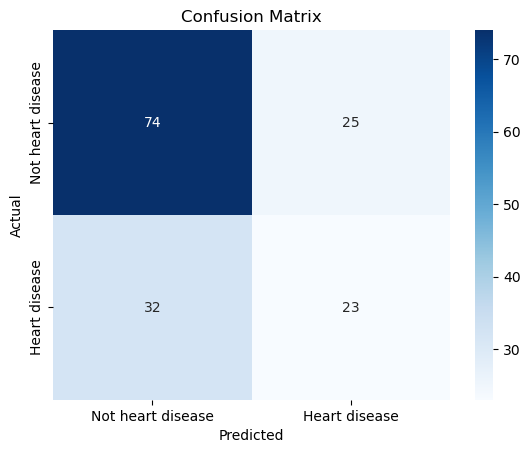

In [184]:
#Visualize the confusion matrix 
sns.heatmap(conf_matrix, annot= True, fmt = 'd', cmap = 'Blues', xticklabels=['Not heart disease','Heart disease' ], yticklabels=['Not heart disease','Heart disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [186]:
#VARIANCE captured by each component 
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print(explained_variance)

print(cumulative_variance)

[0.35872507 0.21892206 0.18305714 0.14135363]
[0.35872507 0.57764714 0.76070428 0.90205791]


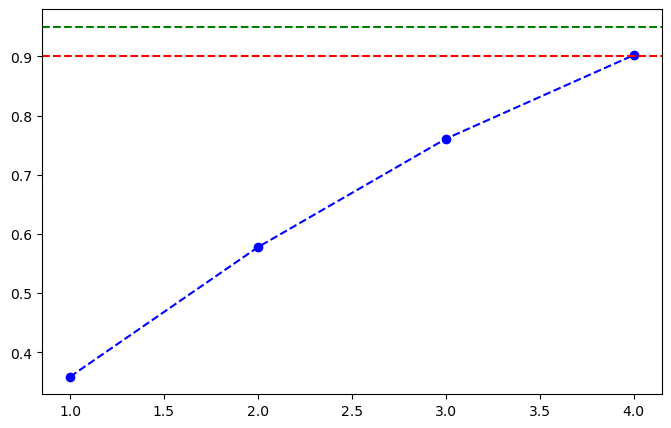

In [188]:
plt.figure(figsize=(8,5))
plt.plot(range(1,len(cumulative_variance) + 1 ) ,  cumulative_variance, marker = 'o', linestyle = '--', color= 'b')
plt.axhline(y=0.9,color='red',linestyle='--',label="90% variance")
plt.axhline(y=0.95,color='green',linestyle='--',label="95% variance")